In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys
sys.path.insert(0, '../')

import blink

import pandas as pd
import numpy as np
import scipy
from scipy import sparse as sp

from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
spectra = blink.open_msms_file('./small.mgf').spectrum.tolist()

S = blink.discretize_spectra(spectra,expand=True)

N = blink.network_kernel(S['mzi'].shape[1], S['mzi'].shape[1])

blink_score = S['mzi'].dot(N).dot(S['mzi'].T)
blink_matches = S['mzc'].dot(N).dot(S['mzc'].T)

In [3]:
sm = sp.load_npz('./matchms_small.npz')
matchms_score, matchms_matches = sm.real, sm.imag

<AxesSubplot:>

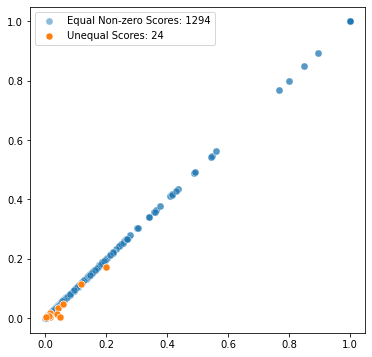

In [4]:
%matplotlib inline
x =matchms_score.toarray().flatten()
y = blink_score.toarray().flatten()
x,y = x[(x>0)&(y>0)], y[(x>0)&(y>0)]


f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=50, label='Equal Non-zero Scores: {}'.format(len(x)), alpha=.5)
x,y = x[(y+1e-6<x)|(x<y-1e-6)], y[(y+1e-6<x)|(x<y-1e-6)]
sns.scatterplot(x=x, y=y, s=50, label='Unequal Scores: {}'.format(len(x)))

/global/common/software/m2650/python3-matchms/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

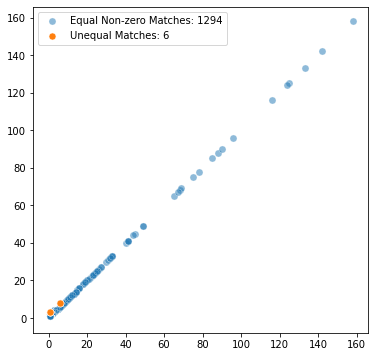

In [5]:
y = matchms_matches.toarray().flatten()
x = blink_matches.toarray().flatten()
x,y = x[(x>0)&(y>0)], y[(x>0)&(y>0)]

f, ax = plt.subplots(figsize=(6, 6))
sns.lineplot([0,1],[0,1], color='black', zorder=-1)
sns.scatterplot(x=x, y=y, s=50, label='Equal Non-zero Matches: {}'.format(len(x)), alpha=.5)
x,y = x[(y+1<x)|(x<y-1)], y[(y+1<x)|(x<y-1)]
sns.scatterplot(x=x, y=y, s=50, label='Unequal Matches: {}'.format(len(x)))

In [6]:
benchmark_df = pd.read_csv('./blink_benchmark.csv').groupby(['comparisons', 'algorithm']).median()

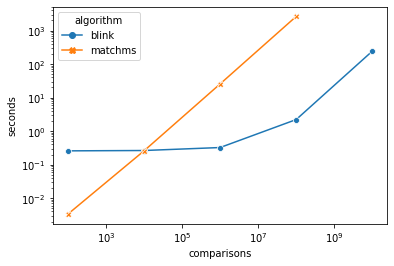

In [7]:
fig, ax = plt.subplots()
sns.lineplot(data=benchmark_df, ax=ax, x='comparisons', y='seconds', 
             hue='algorithm', style='algorithm', 
             markers=True, dashes=False)
plt.xscale('log')
plt.yscale('log')